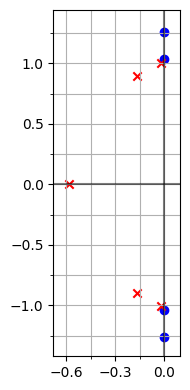

<Figure size 640x480 with 0 Axes>

In [60]:
from scipy import signal
import numpy as np

# Design a normalized elliptic filter with 1 dB passband ripple and 10 dB stopband attenuation
z,p,k = signal.ellip(5, 0.915, 20, 1, output='zpk', analog=True)

from plot_utils import PoleZeroPlotter, save_pdf

plotter = PoleZeroPlotter(figsize=(2,4))
plotter.addPoles(p)
plotter.addZeros(z)
plotter.show(yMajLoc=0.5, yMinLoc=0.25, xMajLoc=0.3, xMinLoc=0.15, loc=None)
plt.tight_layout()
save_pdf('ellip_pzmap', plotter.fig)

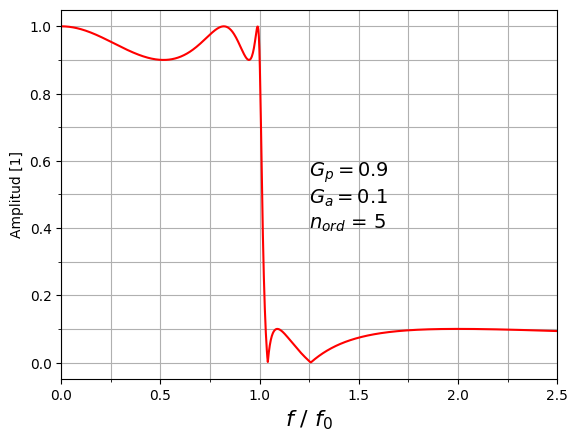

<Figure size 640x480 with 0 Axes>

In [61]:
# plot frequency response
w, h = signal.freqs_zpk(z, p, k, worN=np.linspace(0, 2.5, 1000))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(w, abs(h), color='red')
ax.set_xlabel('$f$ / $f_0$', fontsize=16)
ax.set_ylabel('Amplitud [1]')
ax.grid(which='both', axis='both')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.25))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.set_xlim(w[0], w[-1])
ax.text(1.25, 0.4, '$G_p = 0.9$\n$G_a = 0.1$\n$n_{{ord}}$ = 5', fontsize=14)
plt.show()
plt.tight_layout()
save_pdf('ellip_freqresp', fig)